## Import data from DB.

In [1]:
import pandas as pd
import numpy as np


In [2]:
dfOrg = pd.read_csv('hope_dataset_cleaned.csv')  

print(dfOrg.shape[0])

1243


In [3]:
dfOrg.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,pedido.data.attributes.gender,articulo,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,FISTULA PERITONEAL,male,27395425,2018,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",1.0
1,75.0,FISTULA PERITONEAL,male,28560554,2018,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
2,75.0,FISTULA PERITONEAL,male,28641726,2017,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
3,75.0,FISTULA PERITONEAL,male,26245344,2016,12,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
4,75.0,FISTULA PERITONEAL,male,28942543,2018,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
5,75.0,FISTULA PERITONEAL,male,24782153,2014,6,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
6,75.0,FISTULA PERITONEAL,male,28002229,2018,9,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
7,75.0,FISTULA PERITONEAL,male,27505109,2017,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
8,75.0,FISTULA PERITONEAL,male,24850546,2015,1,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN
9,75.0,FISTULA PERITONEAL,male,29371050,2019,4,"Abdomen,Adenocarcinoma,Antiemetics,Blood Cultu...",NaN


## Transform (factorice) from Categories to continuous atributes

Transform 'pedido.data.attributes.diagnostic_main' atribute

In [4]:
dfKNN = dfOrg

categoriesORGDiagnosticMain = dfKNN['pedido.data.attributes.diagnostic_main'].value_counts()

print("total: " + str(categoriesORGDiagnosticMain.size))

categoriesORGDiagnosticMain

total: 31


CETOACIDOSIS DIABETICA         250
REHABILITACION NEUROLOGICA     180
INFECCION DE PARTES BLANDAS    170
DOLOR ABDOMINAL                131
INSUFICIENCIA RESPIRATORIA      90
FISTULA PERITONEAL              40
DIFICULTAD RESPIRATORIA         30
REACCION ALERGICA               30
INFECCION URINARIA              30
CA GASTRICO                     20
LEGRADO                         20
ACV.ISQUEMICO                   20
CEFALEA INTENSA                 20
PROLAPSO                        20
SINDROME FEBRIL                 20
TORACOTOMIA                     11
ABDOMEN AGUDO                   11
ANEMIA                          10
POLITRAUMATISMO                 10
ADENOMA DE PROSTATA             10
TEP                             10
DOLOR                           10
DERMOLIPECTOMIA                 10
INSUFICIENCIA CARDIACA          10
METRORRAGIA                     10
HEMORRAGIA DIGESTIVA            10
DIABETES                        10
LUXACION COLUMNA CERVICAL       10
DISNEA              

In [5]:
dataDiagnosticMain, categoriesDiagnosticMain = pd.factorize(dfKNN['pedido.data.attributes.diagnostic_main'])

dfKNN['pedido.data.attributes.diagnostic_main'] = dataDiagnosticMain

Transform 'gender' atribute

In [6]:
dataGender, categoriesGender = pd.factorize(dfKNN['pedido.data.attributes.gender'])

dfKNN['pedido.data.attributes.gender'] = dataGender

Transform 'respuesta.pubmed_keys' atribute

In [7]:
categoriesORGPubMedKeys = dfKNN['respuesta.pubmed_keys'].value_counts()

print("total: " + str(categoriesORGPubMedKeys.size))

total: 80


In [8]:
dataPubMedKeys, categoriesPubMedKeys = pd.factorize(dfKNN['respuesta.pubmed_keys'])

dfKNN['respuesta.pubmed_keys'] = dataPubMedKeys

In [9]:
dfKNN.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,pedido.data.attributes.gender,articulo,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,0,0,27395425,2018,1,0,1.0
1,75.0,0,0,28560554,2018,4,0,NaN
2,75.0,0,0,28641726,2017,12,0,NaN
3,75.0,0,0,26245344,2016,12,0,NaN
4,75.0,0,0,28942543,2018,6,0,NaN
5,75.0,0,0,24782153,2014,6,0,NaN
6,75.0,0,0,28002229,2018,9,0,NaN
7,75.0,0,0,27505109,2017,4,0,NaN
8,75.0,0,0,24850546,2015,1,0,NaN
9,75.0,0,0,29371050,2019,4,0,NaN


In [10]:
print("age NaN => " + str(dfKNN[pd.isnull(dfKNN['pedido.data.attributes.age'])].shape[0]))
print("diagnostic_main NaN => " + str(dfKNN[pd.isnull(dfKNN['pedido.data.attributes.diagnostic_main'])].shape[0]))
print("gender NaN => " + str(dfKNN[pd.isnull(dfKNN['pedido.data.attributes.gender'])].shape[0]))
print("articulo NaN => " + str(dfKNN[pd.isnull(dfKNN['articulo'])].shape[0]))
print("articlesRevisedYear NaN => " + str(dfKNN[pd.isnull(dfKNN['respuesta.articlesRevisedYear'])].shape[0]))
print("articlesRevisedMonth NaN => " + str(dfKNN[pd.isnull(dfKNN['respuesta.articlesRevisedMonth'])].shape[0]))
print("pubmed_keys NaN => " + str(dfKNN[pd.isnull(dfKNN['respuesta.pubmed_keys'])].shape[0]))
print("utilidad NaN => " + str(dfKNN[pd.isnull(dfKNN['utilidad'])].shape[0]))

age NaN => 10
diagnostic_main NaN => 0
gender NaN => 0
articulo NaN => 0
articlesRevisedYear NaN => 0
articlesRevisedMonth NaN => 0
pubmed_keys NaN => 0
utilidad NaN => 1192


Remove row with age eq NaN

In [11]:
dfKNN = dfKNN[pd.notnull(dfKNN['pedido.data.attributes.age'])]

## Separe data by utilidad is defined

In [12]:
dfDataSetComplete = dfKNN[pd.notnull(dfKNN['utilidad'])]

print(dfDataSetComplete.shape[0])

dfDataSetToPredict = dfKNN[pd.isnull(dfKNN['utilidad'])]

print(dfDataSetToPredict.shape[0])

51
1182


In [13]:
dfDataSetComplete.head(10)

,pedido.data.attributes.age,pedido.data.attributes.diagnostic_main,pedido.data.attributes.gender,articulo,respuesta.articlesRevisedYear,respuesta.articlesRevisedMonth,respuesta.pubmed_keys,utilidad
0,75.0,0,0,27395425,2018,1,0,1.0
32,75.0,0,0,28694230,2017,12,3,1.0
230,36.0,6,0,28805236,2011,3,21,0.0
290,51.0,10,0,27537587,2011,3,23,0.0
299,51.0,10,0,28148670,2019,3,23,1.0
300,18.0,11,0,25055513,2019,3,24,1.0
303,18.0,11,0,29279563,2017,2,24,0.0
304,18.0,11,0,29279563,2017,2,24,0.0
305,18.0,11,0,28065368,2017,11,24,1.0
311,76.0,12,0,30762794,2019,3,25,1.0


## k-NN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [15]:
# Discard 'articulo' because it is a identifier

X = dfDataSetComplete[['pedido.data.attributes.age', 
       'pedido.data.attributes.diagnostic_main',
       'pedido.data.attributes.gender', 
       'respuesta.articlesRevisedYear', 
       'respuesta.articlesRevisedMonth',
       'respuesta.pubmed_keys']].values

y = dfDataSetComplete['utilidad'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [16]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
k_range = range(1, 20)
accuracy = []
error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(knn.score(X_test, y_test))
    error.append(np.mean(y_pred != y_test))


Text(0, 0.5, 'Accuracy')

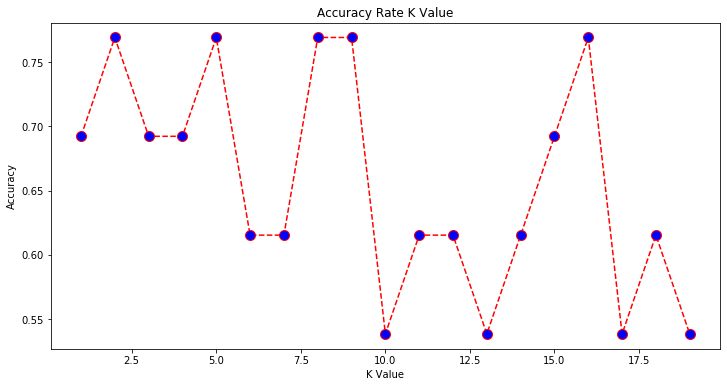

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [19]:
accuracy

[0.6923076923076923,
 0.7692307692307693,
 0.6923076923076923,
 0.6923076923076923,
 0.7692307692307693,
 0.6153846153846154,
 0.6153846153846154,
 0.7692307692307693,
 0.7692307692307693,
 0.5384615384615384,
 0.6153846153846154,
 0.6153846153846154,
 0.5384615384615384,
 0.6153846153846154,
 0.6923076923076923,
 0.7692307692307693,
 0.5384615384615384,
 0.6153846153846154,
 0.5384615384615384]

Text(0, 0.5, 'Mean Error')

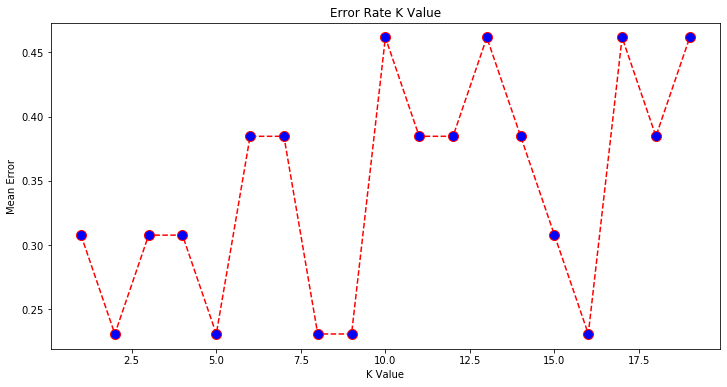

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [21]:
error

[0.3076923076923077,
 0.23076923076923078,
 0.3076923076923077,
 0.3076923076923077,
 0.23076923076923078,
 0.38461538461538464,
 0.38461538461538464,
 0.23076923076923078,
 0.23076923076923078,
 0.46153846153846156,
 0.38461538461538464,
 0.38461538461538464,
 0.46153846153846156,
 0.38461538461538464,
 0.3076923076923077,
 0.23076923076923078,
 0.46153846153846156,
 0.38461538461538464,
 0.46153846153846156]

In [22]:
n_neighbors = 2

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.77


## Print the K-NN classification only with the attributes "diagnostic_main" and "pubmed_keys"

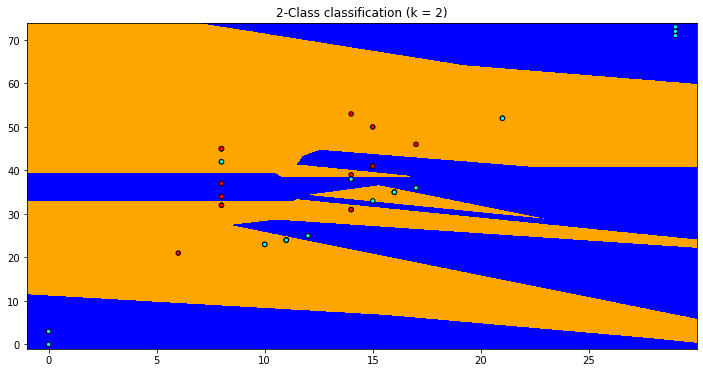

In [23]:
# see: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

X_plot = dfDataSetComplete[['pedido.data.attributes.diagnostic_main',
       'respuesta.pubmed_keys']].values
y_plot = dfDataSetComplete['utilidad'].values

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'blue'])
cmap_bold = ListedColormap(['red', 'cyan'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X_plot, y_plot)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = 2)")

plt.show()

## Run Prediction

In [24]:
def runPrediction(row):
    valuesrow = np.array([row.get(['pedido.data.attributes.age', 
       'pedido.data.attributes.diagnostic_main',
       'pedido.data.attributes.gender', 
       'respuesta.articlesRevisedYear', 
       'respuesta.articlesRevisedMonth',
       'respuesta.pubmed_keys']).values])
    return knn.predict(valuesrow)

dfDataSetToPredict.apply(runPrediction, axis=1)

1       [0.0]
2       [0.0]
3       [0.0]
4       [0.0]
5       [0.0]
        ...  
1238    [1.0]
1239    [1.0]
1240    [1.0]
1241    [1.0]
1242    [1.0]
Length: 1182, dtype: object